# Tech Challenge: Ironhack- Cobify

In [1]:
# Introduction

In [2]:
'''
1. Exploratory data analysis

#    Get to know the domain
#    Explore your data
#    Clean your data
#    Take a look and find connections between data

'''

'\n1. Exploratory data analysis\n\n#    Get to know the domain\n#    Explore your data\n#    Clean your data\n#    Take a look and find connections between data\n\n'

In [3]:
 '''
    Visualization

    Plot your data in a meaningful way

Predictions

    Do you have any hypothesis?
    Can you make any kind of prediction: regression and/or classification?

Storytelling

    What metrics are you obtaining?
    Explain your conclusions
    Shape your new data and conclusions in such a way that is appealing to the listener and tells a story
 '''


'\n   Visualization\n\n   Plot your data in a meaningful way\n\nPredictions\n\n   Do you have any hypothesis?\n   Can you make any kind of prediction: regression and/or classification?\n\nStorytelling\n\n   What metrics are you obtaining?\n   Explain your conclusions\n   Shape your new data and conclusions in such a way that is appealing to the listener and tells a story\n'

In [4]:
# 0. Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 1. Exploratory data analysis

### Get to know the domain

In [5]:
'''
The octane rating or octane number (RON) is an index that indicates the anti-doping power of the fuel, i.e., how much we can compress the air-gasoline mixture without spontaneous explosions 
occurring as a result of the high temperatures and pressures reached inside the cylinder. 
From the technical point of view of engine operation, it is a fundamental parameter, since it determines the maximum pressure and temperature of the cycle, and therefore, 
how much power and performance can be extracted from the engine without the occurrence of knocking or self-detonation problems.

As for the ethanol content, it indicates precisely that, the percentage of ethanol present in the gasoline, 
so that E5 refers to a maximum of 5% and E10 to a maximum of 10%. The gasoline we put in our car is a mixture of many substances, 
the main one being light naphtha, a fraction coming from the distillation of petroleum with a boiling point below 100 °C, to which ethanol itself, butenes, MTBE... are added.

Features:
distance (km); 
the consume (L/100km); 
the average speed (km/h), 
the temperature i had inside (°C), 
the temperature outside (°C),
Weather: raining, air condition o/offn, sunny ;
gas type;

We need to find which would be the "best combustible" for the company (less consumption for the same distance) --gas type cost is not included in data
'''

'\nThe octane rating or octane number (RON) is an index that indicates the anti-doping power of the fuel, i.e., how much we can compress the air-gasoline mixture without spontaneous explosions \noccurring as a result of the high temperatures and pressures reached inside the cylinder. \nFrom the technical point of view of engine operation, it is a fundamental parameter, since it determines the maximum pressure and temperature of the cycle, and therefore, \nhow much power and performance can be extracted from the engine without the occurrence of knocking or self-detonation problems.\n\nAs for the ethanol content, it indicates precisely that, the percentage of ethanol present in the gasoline, \nso that E5 refers to a maximum of 5% and E10 to a maximum of 10%. The gasoline we put in our car is a mixture of many substances, \nthe main one being light naphtha, a fraction coming from the distillation of petroleum with a boiling point below 100 °C, to which ethanol itself, butenes, MTBE... are

### Explore the data

In [6]:
# Read data

df = pd.read_csv("C:/Users/cprieto/_TECH CHALLENGE/measurements.csv")

In [7]:
# Explore data

In [8]:
# We check the headers
df.head(7)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN


In [9]:
# Shape of data
df.shape

(388, 12)

In [10]:
# We check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     object 
 11  refill gas     13 non-null     object 
dtypes: float64(3), int64(5), object(4)
memory usage: 36.5+ KB


In [11]:
# We look for Nans
df.isnull().any()

distance         False
consume          False
speed            False
temp_inside       True
temp_outside     False
specials          True
gas_type         False
AC               False
rain             False
sun              False
refill liters     True
refill gas        True
dtype: bool

In [12]:
# How many Nans are there?
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [13]:
# Basic statistical features

df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [14]:
# Data insights
# It seems refill liters and refill gas columns are fill of Nans
# It seems specials are transformed into Dummy variables (AC,rain and sun) so information is redundant
# temp inside doesn´t seem to have a logical relationship with the matter


### Data Cleaning

In [15]:
# Steps:
# 1. Drop unnecesary columns 

In [16]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [17]:
drop_col = ['temp_inside','specials','refill liters','refill gas']

In [18]:
df.drop(labels = drop_col, axis=1,inplace=True)

In [19]:
df.tail(5)

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun
383,16.0,3.7,39,18,SP98,0,0,0
384,16.1,4.3,38,31,SP98,1,0,0
385,16.0,3.8,45,19,SP98,0,0,0
386,15.4,4.6,42,31,SP98,1,0,0
387,14.7,5.0,25,30,SP98,1,0,0


In [20]:
# Lets see connections among data

In [21]:
# Since we are looking to compare different gast_types I will group data by gas_type and then perform statistical analysis on them

In [22]:
e10 =  df[df["gas_type"] == "E10"]
sp98 = df[df["gas_type"] == "SP98"]

In [23]:
e10.head(5)

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,12,E10,0,0,0
1,12.0,4.2,30,13,E10,0,0,0
2,11.2,5.5,38,15,E10,0,0,0
3,12.9,3.9,36,14,E10,0,0,0
4,18.5,4.5,46,15,E10,0,0,0


## 2. Visualization of data based on gas_type 

#### E10

In [24]:
#lets go with heatmap
def correlation_heatmap(data):
    correlations = data.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show()

C:\Users\cprieto\AppData\Local\Temp\ipykernel_14108\618389038.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


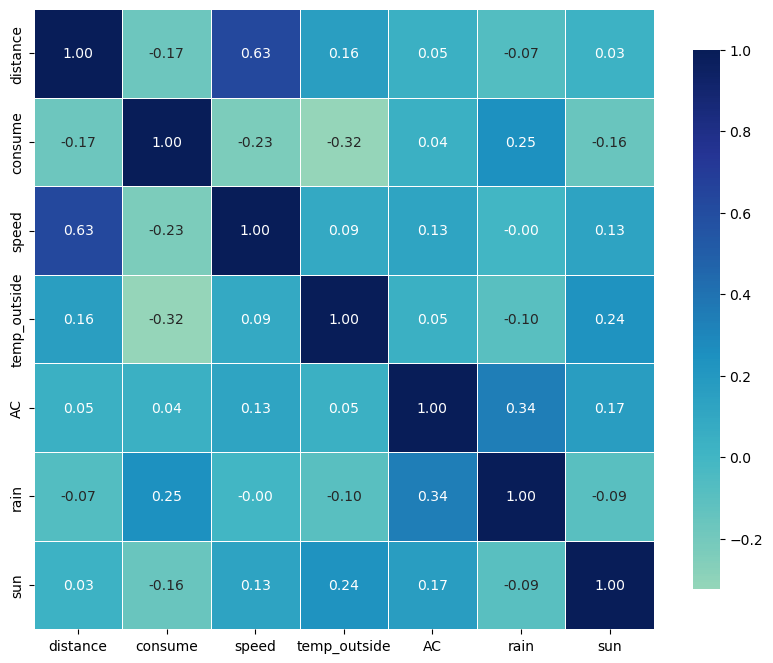

In [25]:
correlation_heatmap(e10)

In [26]:
from pandas_profiling import ProfileReport
import pandas_profiling as pdp

   
profile = ProfileReport(e10, title='Pandas Profiling Report', minimal=True,progress_bar=False,      
    missing_diagrams={
          'heatmap': False,
          'dendrogram': False,
      } )
profile

#### SP98

C:\Users\cprieto\AppData\Local\Temp\ipykernel_14108\618389038.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


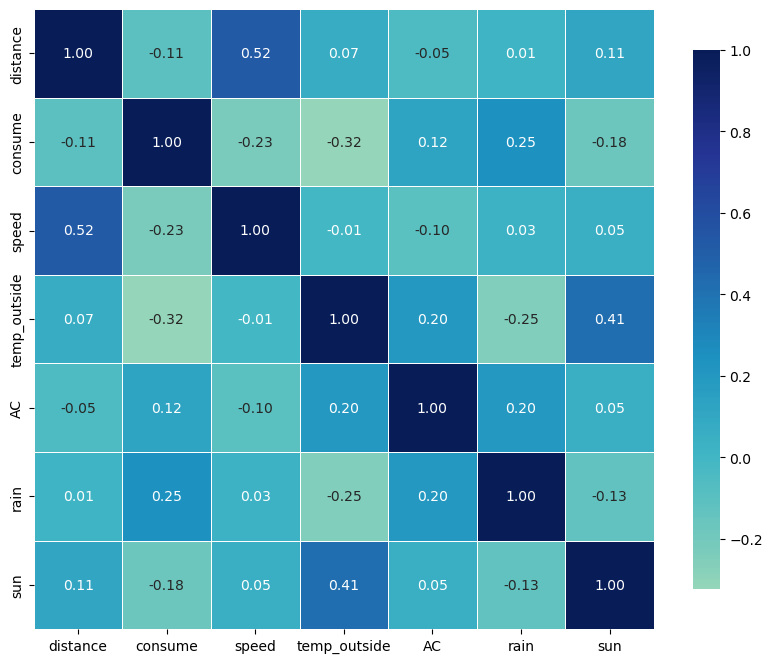

In [27]:
correlation_heatmap(sp98)

In [28]:
profile = ProfileReport(sp98, title='Pandas Profiling Report', minimal=True,progress_bar=False,      
    missing_diagrams={
          'heatmap': False,
          'dendrogram': False,
      } )
profile

In [29]:
# we can see what the ratio between distance / consume provides for each gas_type
m_e10_dc = e10["distance"].mean()/e10["consume"].mean()
m_sp98_dc = sp98["distance"].mean()/sp98["consume"].mean()

In [30]:
ratio = 1- (m_sp98_dc/m_e10_dc)
ratio

0.11064060897931838

In [31]:
# Preliminar results can be extracted:

'''
E10:
Mean distance = 21.09 km
Mean consumption = 4.93 l/100
Mean speed = 43.51 km/h

SP98:
Mean distance = 18.6 km
Mean consumption = 4.9 l/100
Mean speed = 40.82 km/h



Without taking into account the cost per litre we can say that overall SP98 seems to be better as provides with lower mean consumption (11%)

'''




'\nE10:\nMean distance = 21.09 km\nMean consumption = 4.93 l/100\nMean speed = 43.51 km/h\n\nSP98:\nMean distance = 18.6 km\nMean consumption = 4.9 l/100\nMean speed = 40.82 km/h\n\n\n\nWithout taking into account the cost per litre we can say that overall SP98 seems to be better as provides with lower mean consumption (11%)\n\n'

## 3. Prediction

In [32]:
# Can we predict data consumption based on gas_type?

In [33]:
# Lets add another column to the dataframes with actual litre consumption

In [34]:
e10["litre"] = (e10["distance"]*e10["consume"])/100
sp98["litre"] = (sp98["distance"]*sp98["consume"])/100

C:\Users\cprieto\AppData\Local\Temp\ipykernel_14108\1854635763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e10["litre"] = (e10["distance"]*e10["consume"])/100
C:\Users\cprieto\AppData\Local\Temp\ipykernel_14108\1854635763.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp98["litre"] = (sp98["distance"]*sp98["consume"])/100


In [35]:
# Now, lets say we would like to know the consumption based on the distance for each of the gas_types. We would use a linear regression approach

In [78]:
e10.head(5)

,distance,consume,speed,temp_outside,gas_type,AC,rain,sun,litre
0,28.0,5.0,26,12,E10,0,0,0,1.4000
1,12.0,4.2,30,13,E10,0,0,0,0.5040
2,11.2,5.5,38,15,E10,0,0,0,0.6160
3,12.9,3.9,36,14,E10,0,0,0,0.5031
4,18.5,4.5,46,15,E10,0,0,0,0.8325


### E10

In [36]:
#  Divsion between Features and Target variable

In [37]:
X =  pd.DataFrame(e10["distance"])
y =  e10["litre"]

In [38]:
# Division of Dataset into trains and test set. We take 20% for the test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [39]:
# we check
print(len(X_train),len(X_test),len(y_train),len(y_test))

128 32 128 32


In [40]:
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

In [41]:
# Standarization of explanatory variables
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()   # This is the class

In [42]:
X_train= sc_X.fit_transform(X_train)  
X_test =sc_X.transform(X_test)

In [43]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [44]:
# Coefficients of Linear Regression

regressor.coef_

array([0.97807675])

In [74]:
regressor.intercept_

1.0230796875

In [45]:
#Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score of Train : 0.9858020733149551
 Score of Test : 0.985551361015392


In [46]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [47]:
# Model Validation

## evaluating sklearn's LR model in all dataset 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("r2_train:",r2_train)
print("r2_test:",r2_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("rmse_train:", rmse_train)
print("rmse_test:", rmse_test)


r2_train: 0.9858020733149551
r2_test: 0.985551361015392
rmse_train: 0.11737903540200452
rmse_test: 0.09792457027831915


In [48]:
# We can therefore predict litre consumption

In [49]:
y_pred = regressor.predict(X_test)

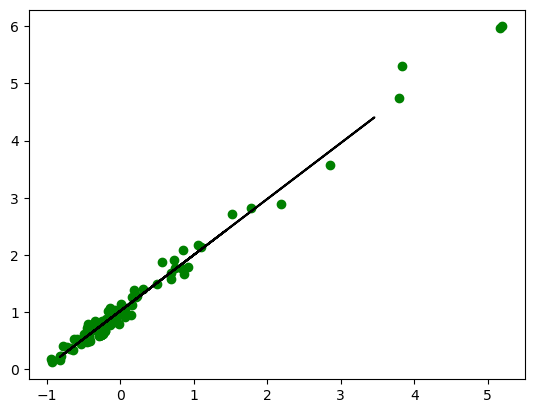

In [50]:
plt.scatter(X_train, y_train,color='g') 

plt.plot(X_test, y_pred,color='k') 


plt.show()

In [51]:
# Fórmula would be in this case y = 1.0230796875 + 0.97807675*X  (Of course real intercept should be 0)

### SP98

In [53]:
Xs =  pd.DataFrame(sp98["distance"])
ys =  sp98["litre"]

In [54]:
from sklearn.model_selection import train_test_split
X_trains,X_tests,y_trains,y_tests = train_test_split(Xs,ys,test_size = 0.2,random_state=0)

In [55]:
print(len(X_trains),len(X_tests),len(y_trains),len(y_tests))

182 46 182 46


In [56]:
X_trains = np.array(X_trains).reshape(-1,1)
X_tests = np.array(X_tests).reshape(-1,1)

In [57]:
X_trains.shape

(182, 1)

In [58]:
# Standarization of explanatory variables
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()   # This is the class

In [59]:
X_trains= sc_X.fit_transform(X_trains)  
X_tests =sc_X.transform(X_tests)

In [60]:
# Apply Linear Regression
from sklearn.linear_model import LinearRegression
regressors = LinearRegression()
regressors.fit(X_trains,y_trains)

LinearRegression()

In [76]:
# Coefficients of Linear Regression

regressors.coef_


array([1.32452617])

In [77]:
regressors.intercept_

0.9163549450549447

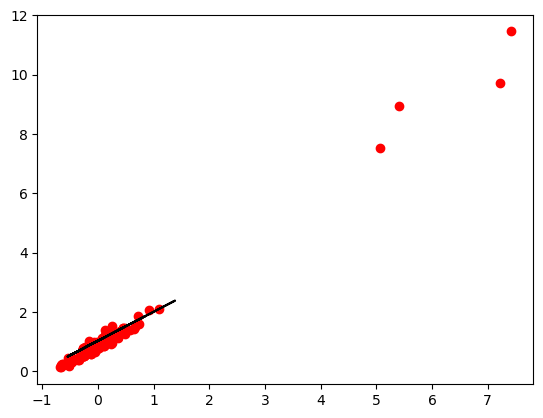

In [68]:
y_preds = regressor.predict(X_tests)
plt.scatter(X_trains, y_trains,color='r') 

plt.plot(X_tests, y_preds,color='k') 


plt.show()

In [69]:
#Verifying overfitting

print(" Score of Train : {}\n Score of Test : {}".format(regressor.score(X_trains, y_trains), regressor.score(X_tests, y_tests)))

 Score of Train : 0.911618133996252
 Score of Test : 0.8150520475950414


In [70]:
y_train_preds = regressor.predict(X_trains)
y_test_preds = regressor.predict(X_tests)

In [73]:
# Fórmula would be in this case y = 0.916354 + 1.32452617*X

In [ ]:
# Models suggest SP98 is less efficient than E10
# We have used a linear regression approach for this but is clearly not appropiate in this case because consumption vs distance do not show a linear relationship (please see attached pdf)